<a href="https://colab.research.google.com/github/Abhyuday19/Python_Repo/blob/main/Clustering_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Performance Metrics Clustering-Silhoutte Coeffient

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples , silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [6]:
## Genearting Some samples from the make_blobs
## This particular setting has one distinct cluster and 3 clusters placed closed togethere

X, y = make_blobs(n_samples =500,
                  n_features =2,
                  centers =2,
                  cluster_std = 1,
                  center_box =(-10.0,10.0),
                  shuffle= True,
                  random_state = 1) ## For Reproductibility

range_n_clusters = [2,3,4,5,6]


In [8]:
y

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

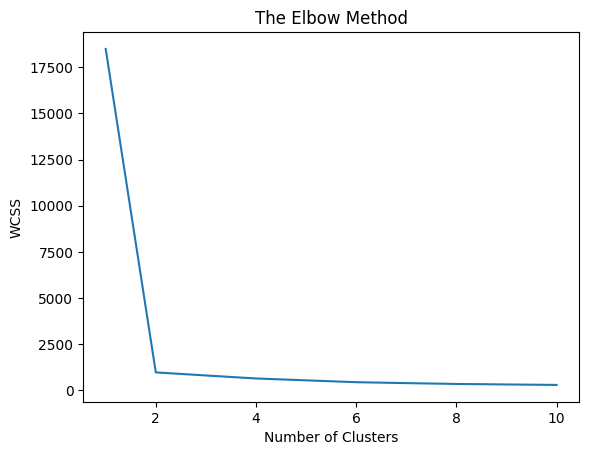

In [19]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  Kmeans_instance = KMeans(n_clusters=i ,random_state =0,n_init=10) # Added n_init for future versions of scikit-learn
  Kmeans_instance.fit(X)
  wcss.append(Kmeans_instance.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
clusterer = KMeans(n_clusters=4, random_state =10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[0 1 0 1 3 1 1 3 2 3 0 3 0 2 2 3 2 0 2 0 0 0 2 2 0 0 1 2 2 3 2 2 0 0 3 3 2
 1 0 2 3 3 2 3 0 0 2 0 1 2 2 0 3 3 1 0 3 1 1 1 1 1 2 3 1 2 0 2 2 3 3 1 0 0
 3 1 3 3 3 1 3 2 0 1 2 2 2 1 2 3 1 0 1 0 1 0 2 0 0 1 2 0 2 2 2 2 3 1 1 2 1
 2 1 1 2 1 1 3 1 0 0 2 0 0 0 1 2 3 3 2 2 2 2 0 0 3 1 0 1 1 0 1 0 1 2 2 0 1
 0 0 0 2 2 0 1 0 3 2 1 2 1 2 1 1 3 3 3 0 1 3 1 2 2 1 2 0 1 3 0 0 2 1 3 3 3
 3 0 1 3 2 1 0 0 3 1 3 2 3 1 0 2 3 3 0 3 1 0 0 1 3 1 0 0 3 3 2 2 2 3 0 1 3
 2 1 1 3 2 1 0 1 3 2 2 2 1 3 1 3 0 2 3 0 3 0 0 2 0 1 0 2 1 3 3 1 2 1 3 1 2
 0 2 2 1 2 3 0 3 1 1 1 3 1 1 0 1 1 0 1 0 1 0 3 1 0 2 1 3 1 2 1 3 0 3 0 1 0
 1 0 0 3 0 3 1 0 0 1 0 3 1 2 0 3 3 2 1 3 0 1 2 0 3 1 2 3 1 2 1 3 0 3 2 1 0
 0 2 2 0 3 1 3 0 1 1 1 2 1 2 2 3 0 3 2 2 0 3 2 2 2 0 1 1 0 1 1 0 0 0 1 0 0
 0 3 0 3 1 3 1 0 1 2 1 1 3 1 3 0 2 1 1 3 3 1 0 2 1 1 2 3 2 3 1 0 3 0 3 3 3
 1 2 0 2 0 2 2 3 1 1 3 1 2 3 2 0 3 1 1 2 3 1 0 0 1 0 0 1 0 0 3 1 2 0 3 3 0
 2 2 3 3 3 0 3 3 3 3 3 1 0 0 1 2 3 1 0 2 1 2 2 0 2 3 2 2 0 3 1 0 1 0 3 2 1
 0 2 0 3 2 2 2 0 3 2 2 0 

For n_clusters =  2 The average Silhouette_Score is : 0.8534455059337385
For n_clusters =  3 The average Silhouette_Score is : 0.5604617446242194
For n_clusters =  4 The average Silhouette_Score is : 0.29973843316047577
For n_clusters =  5 The average Silhouette_Score is : 0.3057248648608598
For n_clusters =  6 The average Silhouette_Score is : 0.3100940368576885


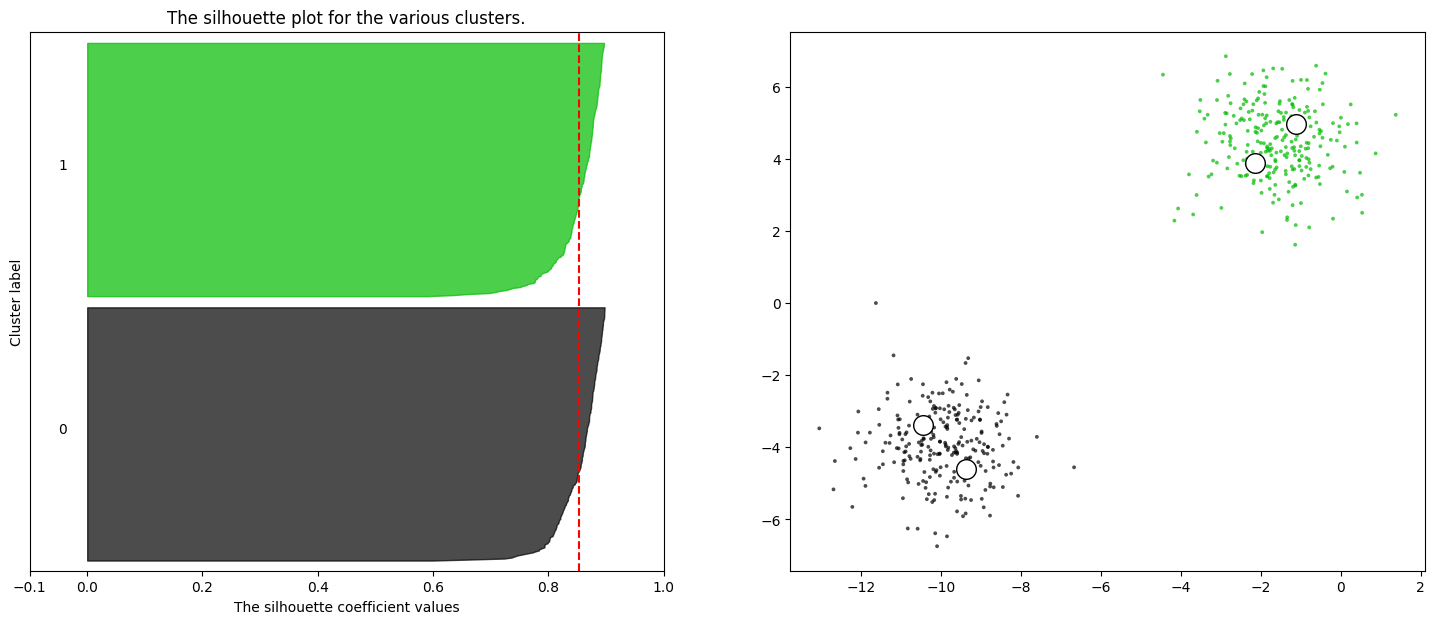

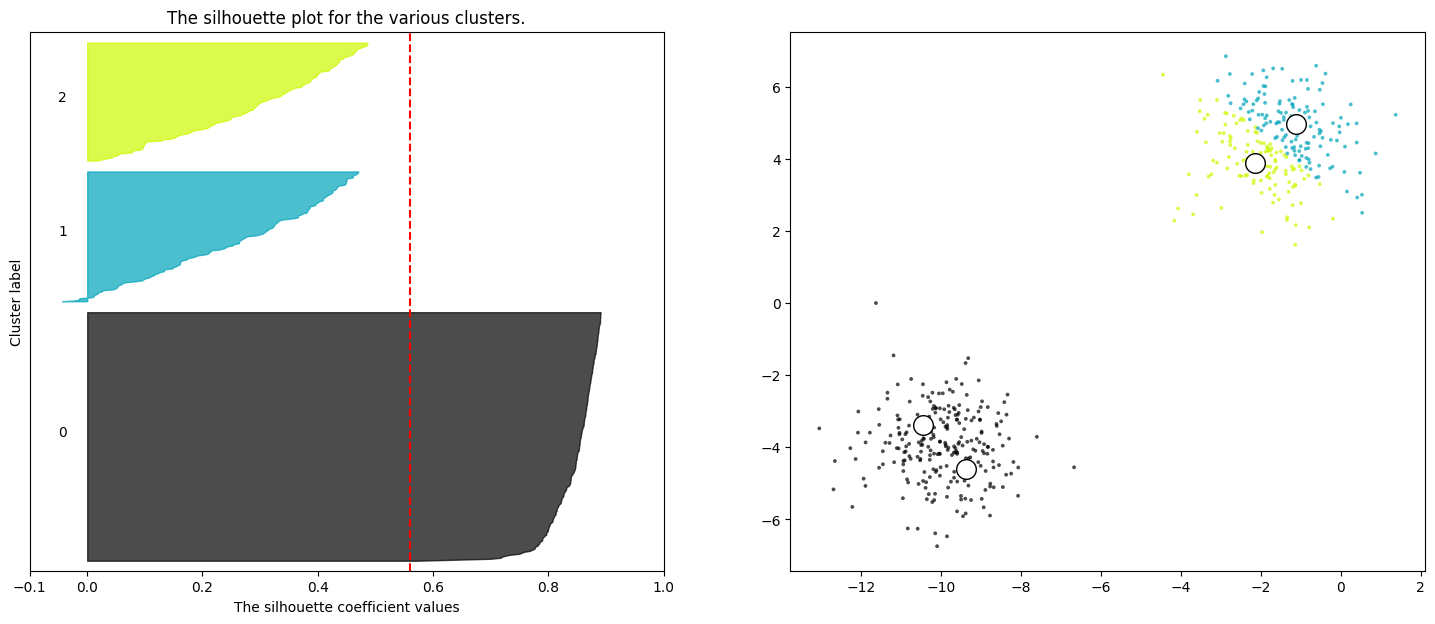

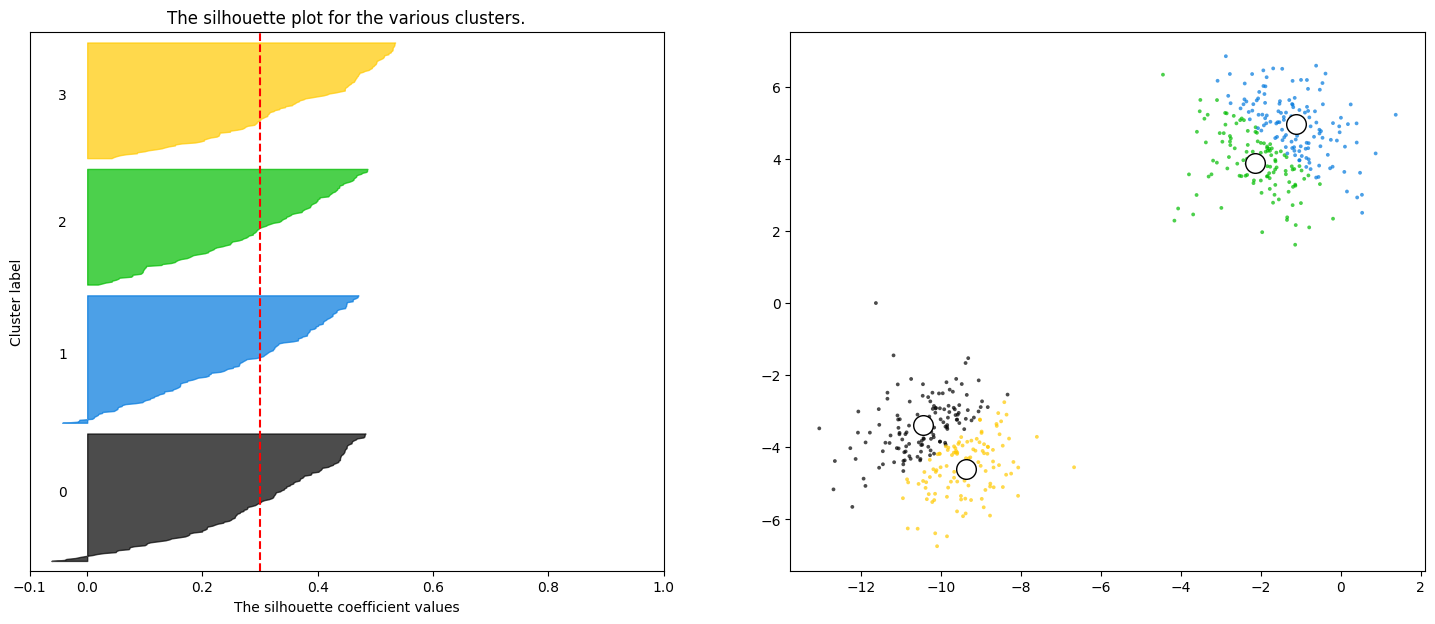

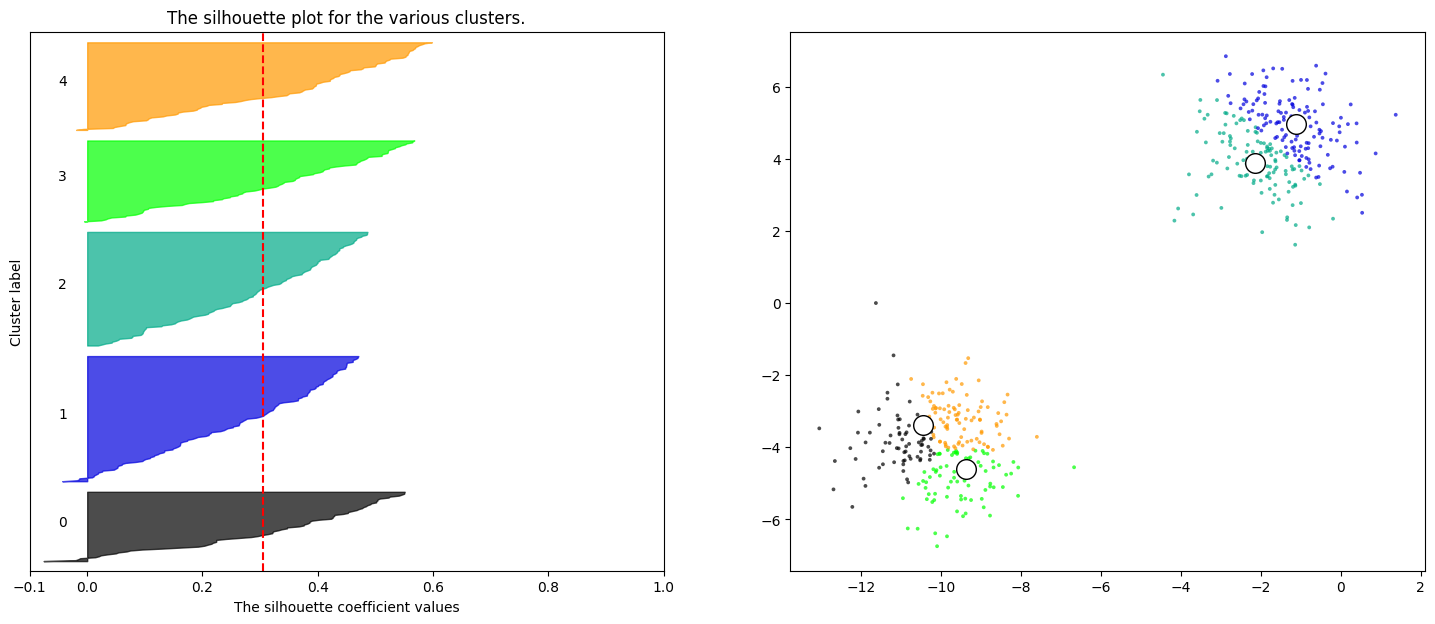

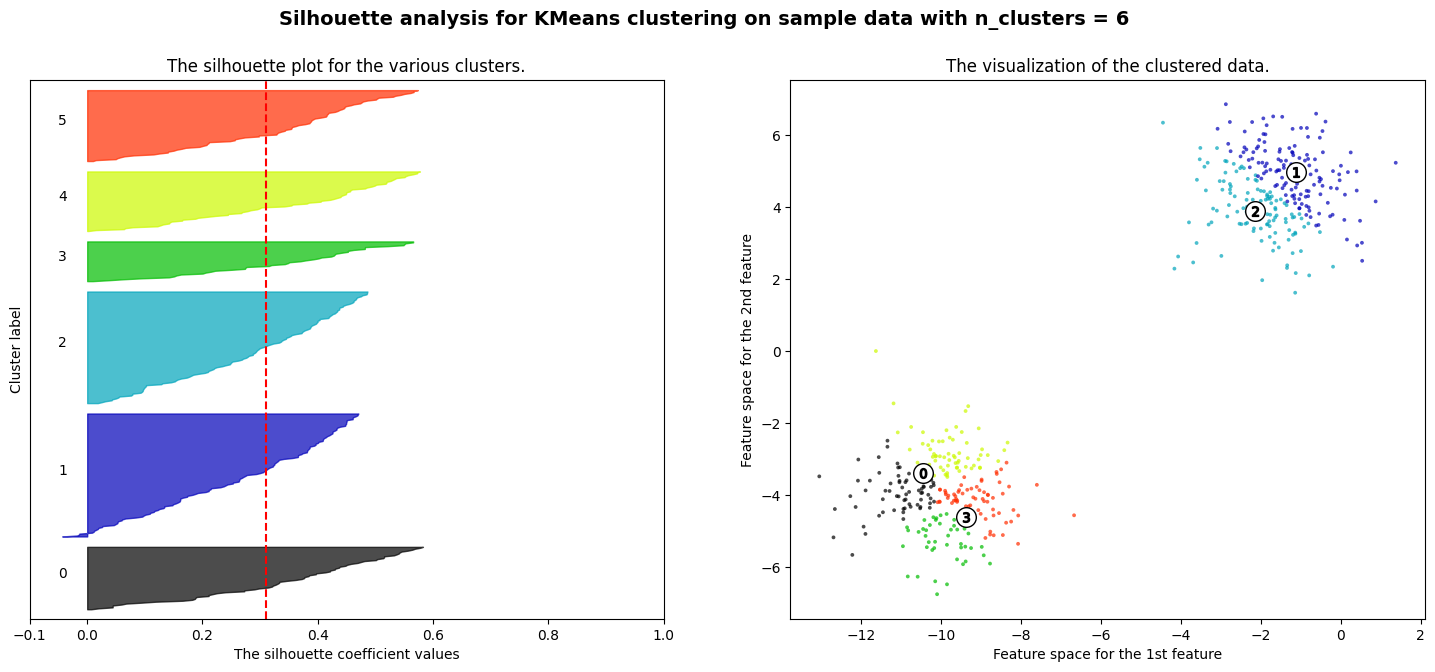

In [23]:
for n_clusters in range_n_clusters:
  # here creating a subplot with 1 row and 2 columns
  fig , (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  # The first Subplot is the Silhouette plot
  # The silhouette Coefficient ranges form the [-1, 1] but in this example it ranges from[-0.1 , 1]
  ax1.set_xlim([0.1, 1])

  # Here the n_clusters+1 *10 is used for inserting ghe blank space between the silhouette plots of the indivisual clusters , to mark there limits clearly
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  # Initialize the Clusters with n_clusters values and a random seed generator of 10 for reproductibility
  clusters = KMeans(n_clusters= n_clusters , random_state =10)
  cluster_labels = clusters.fit_predict(X)

  # The Silhouette Score gives the average value for all the samples
  # This gives the prespective into the density and the separation of the formed clusters

  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters = " , n_clusters , "The average Silhouette_Score is :" , silhouette_avg)

  #Compute the silhouette scores for each samples
  sample_silhouette_values = silhouette_samples(X, cluster_labels)
  y_lower = 10

## Here is the Mapping of the Value is on the Graph.

  for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(
      X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(
      centers[:, 0],
      centers[:, 1],
      marker="o",
      c="white",
      alpha=1,
      s=200,
      edgecolor="k",
    )

for i, c in enumerate(centers):
  ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(
      "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
      % n_clusters,
      fontsize=14,
      fontweight="bold",
    )

plt.show()